# Hotel Booking: Cancellation Prediction of Hotel Bookings
<h2>Amr Abuein: 211353610 <br>
    Hezekiah Bird: 000805350 <h2>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
og_data = pd.read_csv('hotel_bookings.csv')
data = pd.read_csv('hotel_bookings.csv')
city_hotel = data[data["hotel"] == 'City Hotel']
city_hotel.head()

hotel  lead_time  arrival_date_year arrival_date_month  \
40060  City Hotel          6               2015               July   
40061  City Hotel         88               2015               July   
40062  City Hotel         65               2015               July   
40063  City Hotel         92               2015               July   
40064  City Hotel        100               2015               July   

       arrival_date_week_number  arrival_date_day_of_month  \
40060                        27                          1   
40061                        27                          1   
40062                        27                          1   
40063                        27                          1   
40064                        27                          2   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
40060                        0                     2       1       0.0  ...   
40061                        0                     4       2       0.0  ...   
40062                        0                     4       1       0.0  ...   
40063                        2                     4       2       0.0  ...   
40064                        0                     2       2       0.0  ...   

       booking_changes deposit_type agent company days_in_waiting_list  \
40060                0   No Deposit   6.0     NaN                    0   
40061                0   No Deposit   9.0     NaN                    0   
40062                0   No Deposit   9.0     NaN                    0   
40063                0   No Deposit   9.0     NaN                    0   
40064                0   No Deposit   9.0     NaN                    0   

       customer_type   adr  required_car_parking_spaces  \
40060      Transient   0.0                            0   
40061      Transient  76.5                            0   
40062      Transient  68.0                            0   
40063      Transient  76.5                            0   
40064      Transient  76.5                            0   

      total_of_special_requests is_canceled  
40060                         0           0  
40061                         1           1  
40062                         1           1  
40063                         2           1  
40064                         1           1  

[5 rows x 30 columns]

In [3]:
data.shape

(119390, 30)

data points (32in total) are represented by the column names;

0-hotel : Hotel ( Resort Hotel or City Hotel)

1-is_canceled : Value indicating if the booking was canceled (1) or not (0) - Target feature

2- lead_time : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

3- arrival_date_year : Year of arrival date

4- arrival_date_month : Month of arrival date

5- arrival_date_week_number : Week number of year for arrival date

6- arrival_date_day_of_month : Day of arrival date

7- stays_in_weekend_nights : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

8- stays_in_week_nights : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

9- adults : Number of adults

10-children : Number of children

11 - babies : Number of babies

12 - meal : Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)

13 - country : Country of origin. Categories are represented in the ISO 3155–3:2013 format

14 - market_segment : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

15 - distribution_channel : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

16 - is_repeated_guest : Value indicating if the booking name was from a repeated guest (1) or not (0)

17 - previous_cancellations : Number of previous bookings that were cancelled by the customer prior to the current booking

18 - previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking

19 - reserved_room_type : Code of room type reserved. Code is presented instead of designation for anonymity reasons.

20 - assigned_room_type : Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

21 - booking_changes : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

22 - deposit_type : Indication on if the customer made a deposit to guarantee the booking. This variable can assume three

23 - agent : ID of the travel agency that made the booking

24 - company : ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

25 - days_in_waiting_list : Number of days the booking was in the waiting list before it was confirmed to the customer

26 - customer_type : Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking

27 - adr : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

28 - required_car_parking_spaces : Number of car parking spaces required by the customer

29 - total_of_special_requests : Number of special requests made by the customer (e.g. twin bed or high floor)

30 - reservation_status : Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why

31 - reservation_status_date : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

In [4]:
data.describe()      #description of dataset 

lead_time  arrival_date_year  arrival_date_week_number  \
count  119390.000000      119390.000000             119390.000000   
mean      104.011416        2016.156554                 27.165173   
std       106.863097           0.707476                 13.605138   
min         0.000000        2015.000000                  1.000000   
25%        18.000000        2016.000000                 16.000000   
50%        69.000000        2016.000000                 28.000000   
75%       160.000000        2017.000000                 38.000000   
max       737.000000        2017.000000                 53.000000   

       arrival_date_day_of_month  stays_in_weekend_nights  \
count              119390.000000            119390.000000   
mean                   15.798241                 0.927599   
std                     8.780829                 0.998613   
min                     1.000000                 0.000000   
25%                     8.000000                 0.000000   
50%                    16.000000                 1.000000   
75%                    23.000000                 2.000000   
max                    31.000000                19.000000   

       stays_in_week_nights         adults       children         babies  \
count         119390.000000  119390.000000  119386.000000  119390.000000   
mean               2.500302       1.856403       0.103890       0.007949   
std                1.908286       0.579261       0.398561       0.097436   
min                0.000000       0.000000       0.000000       0.000000   
25%                1.000000       2.000000       0.000000       0.000000   
50%                2.000000       2.000000       0.000000       0.000000   
75%                3.000000       2.000000       0.000000       0.000000   
max               50.000000      55.000000      10.000000      10.000000   

       is_repeated_guest  previous_cancellations  \
count      119390.000000           119390.000000   
mean            0.031912                0.087118   
std             0.175767                0.844336   
min             0.000000                0.000000   
25%             0.000000                0.000000   
50%             0.000000                0.000000   
75%             0.000000                0.000000   
max             1.000000               26.000000   

       previous_bookings_not_canceled  booking_changes          agent  \
count                   119390.000000    119390.000000  103050.000000   
mean                         0.137097         0.221124      86.693382   
std                          1.497437         0.652306     110.774548   
min                          0.000000         0.000000       1.000000   
25%                          0.000000         0.000000       9.000000   
50%                          0.000000         0.000000      14.000000   
75%                          0.000000         0.000000     229.000000   
max                         72.000000        21.000000     535.000000   

           company  days_in_waiting_list            adr  \
count  6797.000000         119390.000000  119390.000000   
mean    189.266735              2.321149     101.831122   
std     131.655015             17.594721      50.535790   
min       6.000000              0.000000      -6.380000   
25%      62.000000              0.000000      69.290000   
50%     179.000000              0.000000      94.575000   
75%     270.000000              0.000000     126.000000   
max     543.000000            391.000000    5400.000000   

       required_car_parking_spaces  total_of_special_requests    is_canceled  
count                119390.000000              119390.000000  119390.000000  
mean                      0.062518                   0.571363       0.370416  
std                       0.245291                   0.792798       0.482918  
min                       0.000000                   0.000000       0.000000  
25%                       0.000000                   0.000000       0.000000  
50%                  

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  object 
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119386 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  object 
 12  country         

In [6]:
data.dtypes


hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           

In [7]:
data.isnull().sum()


hotel                                  0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_

<h3>Checking and Removing Data with over 92% '0' Values<h3>

In [8]:
for column_name in data.columns:
    column = data[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print("{:30s} {:4.1f}".format(column_name, count))

hotel                           0.0
lead_time                      6345.0
arrival_date_year               0.0
arrival_date_month              0.0
arrival_date_week_number        0.0
arrival_date_day_of_month       0.0
stays_in_weekend_nights        51998.0
stays_in_week_nights           7645.0
adults                         403.0
children                       110796.0
babies                         118473.0
meal                            0.0
country                         0.0
market_segment                  0.0
distribution_channel            0.0
is_repeated_guest              115580.0
previous_cancellations         112906.0
previous_bookings_not_canceled 115770.0
reserved_room_type              0.0
assigned_room_type              0.0
booking_changes                101314.0
deposit_type                    0.0
agent                           0.0
company                         0.0
days_in_waiting_list           115692.0
customer_type                   0.0
adr                         

<h4>Percentage of Zeros in each Coloumn<h4>

In [9]:
for column_name in data.columns:
    column = data[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    percentage = (count / 119390) * 100
    print("{:30s} {:4.1f}".format(column_name, percentage))

hotel                           0.0
lead_time                       5.3
arrival_date_year               0.0
arrival_date_month              0.0
arrival_date_week_number        0.0
arrival_date_day_of_month       0.0
stays_in_weekend_nights        43.6
stays_in_week_nights            6.4
adults                          0.3
children                       92.8
babies                         99.2
meal                            0.0
country                         0.0
market_segment                  0.0
distribution_channel            0.0
is_repeated_guest              96.8
previous_cancellations         94.6
previous_bookings_not_canceled 97.0
reserved_room_type              0.0
assigned_room_type              0.0
booking_changes                84.9
deposit_type                    0.0
agent                           0.0
company                         0.0
days_in_waiting_list           96.9
customer_type                   0.0
adr                             1.6
required_car_parking_spaces 

These are the data that are statistically insignificant to our dataset:
1. Adults = 0, Children = 0, Babies = 0: Yet there are 180 bookings, which doesn't make sense for us since no one is actually doing the booking here, so we will remove this data as well, so we will change these values to null
2. We are removing the is_repeated_guest, since for the repeated guests its only 3000/120000 data points, which makes up to 0.03% of the whole data, most of the guests are not repeated. 
3. Data that we think are irrelevant that is a factor in predicting cancellations are: arrival_date_year : Year of arrival date, when we are predicting the future, it doesn't make sense to keep track of the previous years as well as the arrival_date_week_number : Week number of year for arrival date, arrival_date_day_of_month : Day of arrival date, as we are only concentrating on the month of arrival date which is presented by "arrival_date_month", we are recording which months of the year people mostly cancel bookings, which can be due to holidays, and etc. 
4. We will be changing values of Meal - undefined to null values and then remove them cause there is a very small number of this less than 0.02% of the entire dataset 
5. agent : ID of the travel agency that made the booking, we are removing since it doesn't affect our data in addition to 16,000 null values
6. We are removing company since it has mostly missing values around 95%
7. We are removing previous_cancellations because 112906 / 119390 (95%) of its data points are '0' values
8. We are removing previous_bookings_not_canceled because 115770 / 119390 (97%) of its data points are '0' values
9. We are removing days_in_waiting_list because 115692 / 119390 (97%) of its data points are '0' values
10. We are removing required_car_parking_spaces because 111974 / 119390 (94%) of its data points are '0' values
11. We are removing babies because 118473 / 119390 (99%) of its data points are '0' values
12. We are removing children because 110796 / 119390 (93%) of its data points are '0' values

<h3>Removing features with over 92% '0' values<h3>

In [10]:
data=data.drop(['previous_cancellations', 'previous_bookings_not_canceled', 'agent', 'company',
                'days_in_waiting_list', 'required_car_parking_spaces', 'babies', 'children', 
                'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 
                'is_repeated_guest'],axis=1)

In [11]:
#we drop irrelevant data + null
#data=data.drop(['country','agent','company','lead_time','meal'],axis=1)


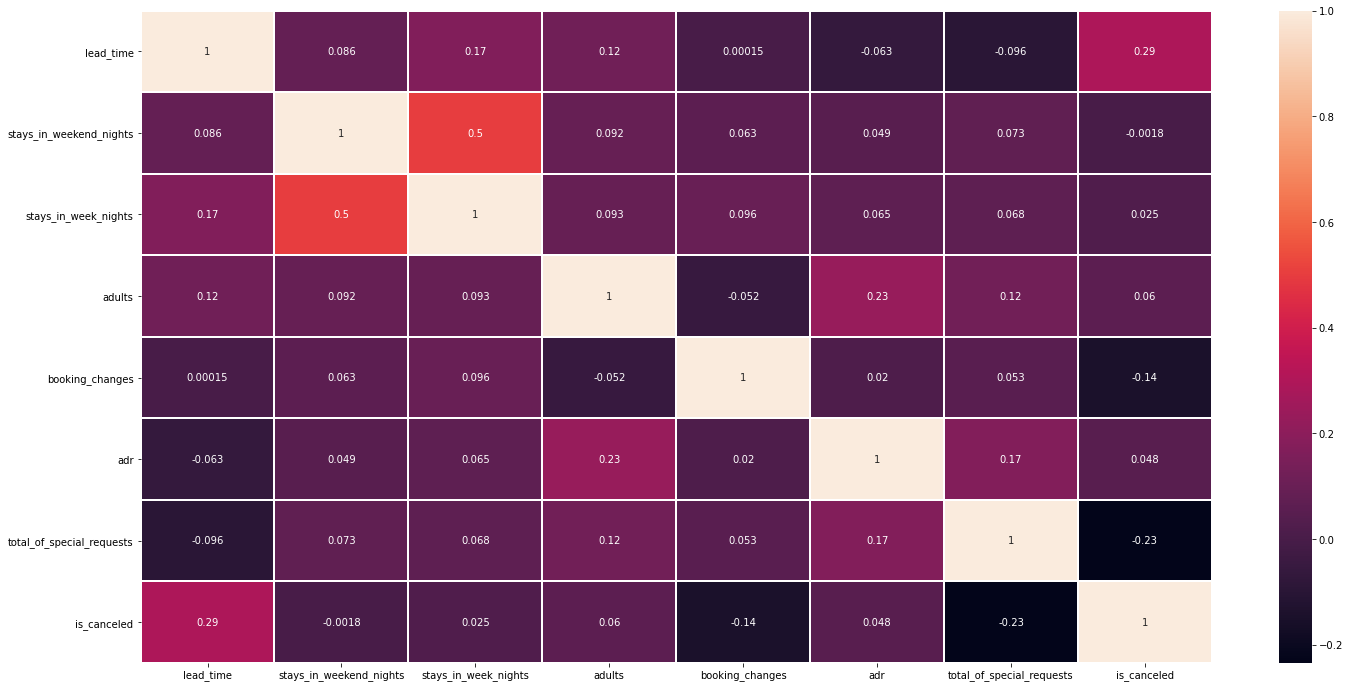

In [12]:
plt.figure(figsize = (24, 12))

corr = data.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()


In [13]:
data=data.dropna()


In [14]:
data.isnull().sum()


hotel                        0
lead_time                    0
arrival_date_month           0
stays_in_weekend_nights      0
stays_in_week_nights         0
adults                       0
meal                         0
country                      0
market_segment               0
distribution_channel         0
reserved_room_type           0
assigned_room_type           0
booking_changes              0
deposit_type                 0
customer_type                0
adr                          0
total_of_special_requests    0
is_canceled                  0
dtype: int64

In [15]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [16]:
data['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [17]:
data['arrival_date_month'].unique()


array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [18]:
#lets find the categorialfeatures
list_1=list(data.columns)

In [19]:
list_cate=[]
for i in list_1:
    if data[i].dtype=='object':
        list_cate.append(i)

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [21]:
for i in list_cate:
    data[i]=le.fit_transform(data[i])

In [22]:
data

hotel  lead_time  arrival_date_month  stays_in_weekend_nights  \
0           1        342                   5                        0   
1           1        737                   5                        0   
2           1          7                   5                        0   
3           1         13                   5                        0   
4           1         14                   5                        0   
...       ...        ...                 ...                      ...   
119385      0         23                   1                        2   
119386      0        102                   1                        2   
119387      0         34                   1                        2   
119388      0        109                   1                        2   
119389      0        205                   1                        2   

        stays_in_week_nights  adults  meal  country  market_segment  \
0                          0       2     0      135               3   
1                          0       2     0      135               3   
2                          1       1     0       59               3   
3                          1       1     0       59               2   
4                          2       2     0       59               6   
...                      ...     ...   ...      ...             ...   
119385                     5       2     0       15               5   
119386                     5       3     0       56               6   
119387                     5       2     0       43               6   
119388                     5       2     0       59               6   
119389                     7       2     2       43               6   

        distribution_channel  reserved_room_type  assigned_room_type  \
0                          1                   2                   2   
1                          1                   2                   2   
2                          1                   0                   2   
3                          0                   0                   0   
4                          3                   0                   0   
...                      ...                 ...                 ...   
119385                     3                   0                   0   
119386                     3                   4                   4   
119387                     3                   3                   3   
119388                     3                   0                   0   
119389                     3                   0                   0   

        booking_changes  deposit_type  customer_type     adr  \
0                     3             0              2    0.00   
1                     4             0              2    0.00   
2                     0             0              2   75.00   
3                     0             0              2   75.00   
4                     0             0              2   98.00   
...                 ...           ...            ...     ...   
119385                0             0              2   96.14   
119386                0             0              2  225.43   
119387                0             0              2  157.71   
119388                0             0              2  104.40   
119389                0             0              2  151.20   

        total_of_special_requests  is_canceled  
0                               0            0  
1                               0            0  
2                               0            0  
3                               0            0  
4                               1            0  
...                           ...          ...  
119385                          0            0  
119386                          2            0  
119387                          4            0  
119388                          0            0  
119389                          2            0  

[118902 rows x 18 columns]

In [23]:
data.isna().mean()

hotel                        0.0
lead_time                    0.0
arrival_date_month           0.0
stays_in_weekend_nights      0.0
stays_in_week_nights         0.0
adults                       0.0
meal                         0.0
country                      0.0
market_segment               0.0
distribution_channel         0.0
reserved_room_type           0.0
assigned_room_type           0.0
booking_changes              0.0
deposit_type                 0.0
customer_type                0.0
adr                          0.0
total_of_special_requests    0.0
is_canceled                  0.0
dtype: float64

In [24]:
data.isna().sum().sum()

0

<h3>Visualizations<h3>

0    0.628627
1    0.371373
Name: is_canceled, dtype: float64

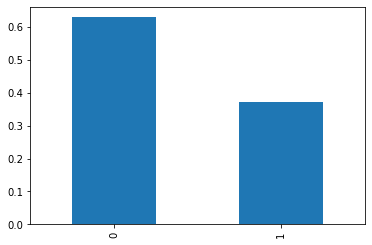

In [25]:
data.is_canceled.value_counts(normalize=True).plot(kind='bar');
data.is_canceled.value_counts(normalize=True)

<h5>62.96% is not canceled<h5>

What are the satistics of the data?

In [26]:
data.describe()

hotel      lead_time  arrival_date_month  \
count  118902.000000  118902.000000       118902.000000   
mean        0.333014     104.308027            5.490286   
std         0.471293     106.903127            3.535015   
min         0.000000       0.000000            0.000000   
25%         0.000000      18.000000            2.000000   
50%         0.000000      69.000000            6.000000   
75%         1.000000     161.000000            8.000000   
max         1.000000     737.000000           11.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            118902.000000         118902.000000  118902.000000   
mean                  0.928891              2.502136       1.858404   
std                   0.996211              1.900165       0.578576   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  16.000000             41.000000      55.000000   

                meal        country  market_segment  distribution_channel  \
count  118902.000000  118902.000000   118902.000000         118902.000000   
mean        0.557097      92.990076        4.934812              2.591033   
std         1.069544      44.676327        1.261363              0.901645   
min         0.000000       0.000000        0.000000              0.000000   
25%         0.000000      56.000000        4.000000              3.000000   
50%         0.000000      81.000000        5.000000              3.000000   
75%         0.000000     135.000000        6.000000              3.000000   
max         4.000000     176.000000        7.000000              4.000000   

       reserved_room_type  assigned_room_type  booking_changes   deposit_type  \
count       118902.000000       118902.000000    118902.000000  118902.000000   
mean             0.989958            1.325209         0.221174       0.125288   
std              1.696122            1.875542         0.652775       0.335137   
min              0.000000            0.000000         0.000000       0.000000   
25%              0.000000            0.000000         0.000000       0.000000   
50%              0.000000            0.000000         0.000000       0.000000   
75%              3.000000            3.000000         0.000000       0.000000   
max              9.000000           11.000000        21.000000       2.000000   

       customer_type            adr  total_of_special_requests    is_canceled  
count  118902.000000  118902.000000              118902.000000  118902.000000  
mean        2.137592     102.000808                   0.571706       0.371373  
std         0.577870      50.487004                   0.792678       0.483174  
min         0.000000      -6.380000                   0.000000       0.000000  
25%         2.000000      70.000000                   0.000000       0.000000  
50%         2.000000      95.000000                   0.000000       0.000000  
75%         2.000000     126.000000                   1.000000       1.000000  
max         3.000000    5400.000000                   5.000000       1.000000

In [27]:
data.corr()['is_canceled'].drop('is_canceled')

hotel                       -0.133990
lead_time                    0.291940
arrival_date_month          -0.001800
stays_in_weekend_nights     -0.002639
stays_in_week_nights         0.024103
adults                       0.058408
meal                        -0.018679
country                      0.270254
market_segment               0.056972
distribution_channel         0.165596
reserved_room_type          -0.062228
assigned_room_type          -0.175882
booking_changes             -0.144669
deposit_type                 0.468466
customer_type               -0.068698
adr                          0.046133
total_of_special_requests   -0.235595
Name: is_canceled, dtype: float64

And now plot correlations to is_canceled

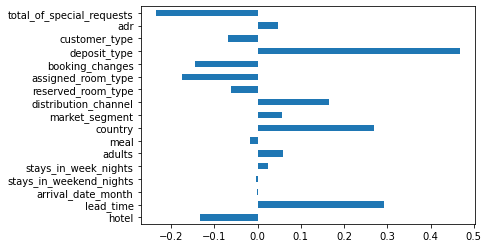

In [28]:
data.corr()['is_canceled'].drop('is_canceled').plot(kind='barh');

<h2> Data Splitting <h2>

In [29]:
y=data['hotel']
x=data.drop('hotel',axis=1)

In [30]:
import math       
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [31]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

95121
23781
95121
23781


In [32]:
x_train

lead_time  arrival_date_month  stays_in_weekend_nights  \
11347         202                   8                        0   
7346           98                   1                        2   
22253          14                   7                        2   
73111         507                   1                        0   
6523          231                   6                        0   
...           ...                 ...                      ...   
103728        120                   2                        2   
6898          207                   5                        4   
84142          15                   3                        0   
62292         129                   4                        2   
102764         13                   2                        1   

        stays_in_week_nights  adults  meal  country  market_segment  \
11347                      1       2     2      135               4   
7346                       5       2     0       51               6   
22253                      1       2     0       51               6   
73111                      1       2     0      135               5   
6523                       3       2     0       76               5   
...                      ...     ...   ...      ...             ...   
103728                     5       2     2       25               6   
6898                      10       2     0      135               6   
84142                      1       1     0      135               2   
62292                      1       1     0      135               4   
102764                     0       1     0      123               6   

        distribution_channel  reserved_room_type  assigned_room_type  \
11347                      3                   3                   3   
7346                       3                   0                   0   
22253                      3                   3                   3   
73111                      3                   0                   0   
6523                       3                   4                   4   
...                      ...                 ...                 ...   
103728                     3                   3                   3   
6898                       3                   3                   3   
84142                      3                   0                   0   
62292                      3                   3                   3   
102764                     3                   0                   0   

        booking_changes  deposit_type  customer_type     adr  \
11347                 0             0              3   90.00   
7346                  2             0              2  201.00   
22253                 0             0              2   58.00   
73111                 0             1              2   90.00   
6523                  0             0              2   81.00   
...                 ...           ...            ...     ...   
103728                1             0              2  131.33   
6898                  0             0              2  110.25   
84142                 0             0              3   81.00   
62292                 0             1              2   67.00   
102764                0             0              2   96.00   

        total_of_special_requests  is_canceled  
11347                           0            1  
7346                            0            1  
22253                           2            0  
73111                           0            1  
6523                            2            0  
...                           ...          ...  
103728                          0            0  
6898                            0            1  
84142                           0            0  
62292                           0            1  
102764                          0            0  

[95121 rows x 17 columns]

In [33]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((95121, 17), (95121,), (23781, 17), (23781,))

<h1> Data Evaluation <h1>

In [34]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

The benchmark would be the most common label in the train set

In [35]:
y_train.value_counts()

0    63378
1    31743
Name: hotel, dtype: int64

In this case it's 0 (not cancelled), let's check its performance on both train and test

Why are we using Precisions?<br>
Precision answers the question what portion of positive identifications is actually correct. In our case the precision would be showing which proportion of predicting a booking that ‘is not canceled’ were correctly predicted. Therefore, the precision basically tells us that when we predict a booking that ‘is not canceled’, we are correct a certain percent (this percent is the precision) of the time. <br>
This is important for us because we want to know how often someone who books a room isn’t going to cancel the booking and what percent of the time can we predict this correctly.<br>

Why are we using Recall?<br><br>
Recall tells us what actual positives were identified correctly. Therefore the recall tells exactly what percent (this percent is the recall) of bookings ‘not canceled’ are correctly identified. <br>

Ultimately, choosing both precision and recall enables us to fully test the effectiveness of our model by seeing how well it predicts actual bookings ‘not canceled’ and what portions of bookings ‘not canceled’ were correctly predicted.

Why are we using F1 Score?
By calculating the harmonic mean of a classifier's accuracy and recall, the F1-score integrates both into a single statistic. Comparing the effectiveness of two classifiers is its main purpose.
Essentially, the F1 Score can be used to compare classifier models with varying precisions and recalls in order to determine which one will produce better results.

<h2>BenchMark Test<h2>

In [36]:
import numpy as np
def get_benchmark_predictions(x, benchmark_value):
    # returns a numpy array on the same length as x with all values equal to benchmark_value
    return np.ones(len(x))*benchmark_value

benchmark_value = 0

y_train_pred = get_benchmark_predictions(x_train, benchmark_value)
y_test_pred = get_benchmark_predictions(x_test, benchmark_value)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1score = f1_score(y_test, y_test_pred)

print('\n Train Accuracy: ', train_acc, 
      '\n Test Accuracy: ', test_acc,
      '\n Precision: ', precision,
      '\n Recall: ', recall,
      '\n F1 Score: ', f1score,
     )


 Train Accuracy:  0.6662882013435519 
 Test Accuracy:  0.6697783945166309 
 Precision:  0.0 
 Recall:  0.0 
 F1 Score:  0.0


/Users/amroabuein/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Why is precision, recall, and f1 score 0?<br>
In our benchmark model we are only testing for all 0 values, because our benchmark is set to 0. As a result, we would have 0 False Positives and 0 True Negatives. Therefore, it cannot calculate precision, recall, and f1 score due to the fact that the only class we are predicting is the positive class booking ‘not canceled’ of 0. So even if you were to run the numbers you would end up with a precision of 1 due to there being no False Positives and the recall would just be equal to the train accuracy. So naturally there wouldn’t be a point in even calculating the f1 score because it wouldn't really be a good representation of a model that is essentially predicting a class with only 1 label. 



The performance on train and test is almost equal, 0.666 and 0.669 almost the same, our best algorithm should beat the test performance, however the benchmark has a very low accuracy

<h2>KNeighborsClassifier<h2>

In [37]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn_1 = KNeighborsClassifier(n_neighbors=5)
clf_knn_1.fit(x_train, y_train)

y_train_pred = clf_knn_1.predict(x_train)
y_test_pred = clf_knn_1.predict(x_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

acc_knn = accuracy_score(y_test, y_test_pred)

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1score = f1_score(y_test, y_test_pred)

print('\n Train Accuracy: ', train_acc, 
      '\n Test Accuracy: ', test_acc,
      '\n Precision: ', precision,
      '\n Recall: ', recall,
      '\n F1 Score: ', f1score,
     )


 Train Accuracy:  0.904616225649436 
 Test Accuracy:  0.86392498212859 
 Precision:  0.8332611520138589 
 Recall:  0.7350057302941551 
 F1 Score:  0.7810554803788904


In [38]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn_2 = KNeighborsClassifier(n_neighbors=10)
clf_knn_2.fit(x_train, y_train)

y_train_pred = clf_knn_2.predict(x_train)
y_test_pred = clf_knn_2.predict(x_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

acc_knn = accuracy_score(y_test, y_test_pred)

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1score = f1_score(y_test, y_test_pred)

print('\n Train Accuracy: ', train_acc, 
      '\n Test Accuracy: ', test_acc,
      '\n Precision: ', precision,
      '\n Recall: ', recall,
      '\n F1 Score: ', f1score,
     )


 Train Accuracy:  0.8741918188412653 
 Test Accuracy:  0.849543753416593 
 Precision:  0.8547717842323651 
 Recall:  0.6558003310836623 
 F1 Score:  0.74218187058654


In [39]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn_3 = KNeighborsClassifier(n_neighbors=15)
clf_knn_3.fit(x_train, y_train)

y_train_pred = clf_knn_3.predict(x_train)
y_test_pred = clf_knn_3.predict(x_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

acc_knn = accuracy_score(y_test, y_test_pred)

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1score = f1_score(y_test, y_test_pred)

print('\n Train Accuracy: ', train_acc, 
      '\n Test Accuracy: ', test_acc,
      '\n Precision: ', precision,
      '\n Recall: ', recall,
      '\n F1 Score: ', f1score,
     )


 Train Accuracy:  0.8636999190504726 
 Test Accuracy:  0.8442454059963836 
 Precision:  0.8355167394468704 
 Recall:  0.6578377690054756 
 F1 Score:  0.7361071530350528


Already better than the benchmark, and seems like the algorithm overfits a bit, also we know that KNN can highly suffer from features that are in different scales, here the higher the k value is the worse our algorithm is performing, as we can see from our classification metrics, the reason behind this is small values of k memorise noise, and thus result in a non-smooth decision boundary. This increases the total error, where it is dominated by high variance. However, large values of k ignore underlying trends in the data (local features), and thus result in a smooth decision boundary. This increases the total error, where it is dominated by high bias. Precision: comparing it to mean of distribution because the classifciation quality is very low, we are not using the entire data to its complete potential, if you increase k to the maximum the precision will increase you are comparing it to the mean, quality of judgement reduces to the mean, which is very poor due to the high data number. 

<h2>KNeighbors with StandardScaler<h2>

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

clf_knn_scaled = KNeighborsClassifier(n_neighbors=5)
clf_knn_scaled.fit(x_train_scaled, y_train)

y_train_pred = clf_knn_scaled.predict(x_train_scaled)
y_test_pred = clf_knn_scaled.predict(x_test_scaled)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)


acc_knn_scaled = accuracy_score(y_test, y_test_pred)

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1score = f1_score(y_test, y_test_pred)

print('\n Train Accuracy: ', train_acc, 
      '\n Test Accuracy: ', test_acc,
      '\n Precision: ', precision,
      '\n Recall: ', recall,
      '\n F1 Score: ', f1score,
     )


 Train Accuracy:  0.9263149041746828 
 Test Accuracy:  0.8925192380471805 
 Precision:  0.8640549828178694 
 Recall:  0.800458423532408 
 F1 Score:  0.831041776837652


In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

clf_knn_scaled = KNeighborsClassifier(n_neighbors=10)
clf_knn_scaled.fit(x_train_scaled, y_train)

y_train_pred = clf_knn_scaled.predict(x_train_scaled)
y_test_pred = clf_knn_scaled.predict(x_test_scaled)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)


acc_knn_scaled = accuracy_score(y_test, y_test_pred)

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1score = f1_score(y_test, y_test_pred)



print('\n Train Accuracy: ', train_acc, 
      '\n Test Accuracy: ', test_acc,
      '\n Precision: ', precision,
      '\n Recall: ', recall,
      '\n F1 Score: ', f1score,
     )


 Train Accuracy:  0.903123390208261 
 Test Accuracy:  0.8846137672932173 
 Precision:  0.88804496430199 
 Recall:  0.7444288806825416 
 F1 Score:  0.8099196453311165


In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

clf_knn_scaled = KNeighborsClassifier(n_neighbors=15)
clf_knn_scaled.fit(x_train_scaled, y_train)

y_train_pred = clf_knn_scaled.predict(x_train_scaled)
y_test_pred = clf_knn_scaled.predict(x_test_scaled)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)


acc_knn_scaled = accuracy_score(y_test, y_test_pred)

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1score = f1_score(y_test, y_test_pred)

print('\n Train Accuracy: ', train_acc, 
      '\n Test Accuracy: ', test_acc,
      '\n Precision: ', precision,
      '\n Recall: ', recall,
      '\n F1 Score: ', f1score,
     )


 Train Accuracy:  0.898739500215515 
 Test Accuracy:  0.8838568605189017 
 Precision:  0.8669453654317428 
 Recall:  0.7658219788615815 
 F1 Score:  0.8132521974306963


Even better performance! It does give us higher accuracy but lower precision, however it also goes with the above explaination as we increase the k value our accuracy and precision gets worse, and this is because of how kNN model works.

<h2>DecisionTreeClassifier<h2>

In [43]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
decision_tree_1 = DecisionTreeClassifier(max_depth=3)
decision_tree_1.fit(x_train, y_train)

y_train_pred = decision_tree_1.predict(x_train)
y_test_pred = decision_tree_1.predict(x_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

acc_dtc = accuracy_score(y_test, y_test_pred)

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1score = f1_score(y_test, y_test_pred)

print('\n Train Accuracy: ', train_acc, 
      '\n Test Accuracy: ', test_acc,
      '\n Precision: ', precision,
      '\n Recall: ', recall,
      '\n F1 Score: ', f1score,
     )


 Train Accuracy:  0.8139317290608804 
 Test Accuracy:  0.8153567974433371 
 Precision:  0.7574360499702558 
 Recall:  0.6485419584872023 
 F1 Score:  0.698772038142279


Because feature_importances_ follows the order of columns

In [44]:
data.columns

Index(['hotel', 'lead_time', 'arrival_date_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'booking_changes', 'deposit_type', 'customer_type', 'adr',
       'total_of_special_requests', 'is_canceled'],
      dtype='object')

In [45]:
decision_tree_1.feature_importances_

array([0.        , 0.        , 0.        , 0.25765296, 0.        ,
       0.01440341, 0.03186958, 0.        , 0.        , 0.        ,
       0.16477044, 0.        , 0.        , 0.        , 0.53130361,
       0.        , 0.        ])

In [46]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
decision_tree_2 = DecisionTreeClassifier(max_depth=6)
decision_tree_2.fit(x_train, y_train)

y_train_pred = decision_tree_2.predict(x_train)
y_test_pred = decision_tree_2.predict(x_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

acc_dtc = accuracy_score(y_test, y_test_pred)

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1score = f1_score(y_test, y_test_pred)

print('\n Train Accuracy: ', train_acc, 
      '\n Test Accuracy: ', test_acc,
      '\n Precision: ', precision,
      '\n Recall: ', recall,
      '\n F1 Score: ', f1score,
     )


 Train Accuracy:  0.8564670262087236 
 Test Accuracy:  0.8565241158908372 
 Precision:  0.8680590087850157 
 Recall:  0.6668788997835222 
 F1 Score:  0.7542848912573815


In [47]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
decision_tree_3 = DecisionTreeClassifier(max_depth=9)
decision_tree_3.fit(x_train, y_train)

y_train_pred = decision_tree_3.predict(x_train)
y_test_pred = decision_tree_3.predict(x_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

acc_dtc = accuracy_score(y_test, y_test_pred)

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1score = f1_score(y_test, y_test_pred)

print('\n Train Accuracy: ', train_acc, 
      '\n Test Accuracy: ', test_acc,
      '\n Precision: ', precision,
      '\n Recall: ', recall,
      '\n F1 Score: ', f1score,
     )


 Train Accuracy:  0.8879006738785337 
 Test Accuracy:  0.8863378327236029 
 Precision:  0.8682780320366132 
 Recall:  0.7730803514580415 
 F1 Score:  0.8179184910744358


A deeper tree will yield a better precision and better accuracy given that the lowest weighted entropy will yield, thus the more information we are gaining and the better our classification will be.
A deeper tree will yield a better precision and tree accuracy given that the lowest weighted entropy will give the largest information gain. The deeper the tree become the more information we gain and the better the classification will be


In [48]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (50,50), dpi=350)
plot_tree(decision_tree_1,
           feature_names=x_train.columns,
           class_names=['cancelled', 'is_canceled'],
           filled = True);

## <h2>RandomForestClassifier<h2>

In [49]:
from sklearn.ensemble import RandomForestClassifier
clf_rd_1 = RandomForestClassifier(n_estimators=100, max_depth=3)
clf_rd_1.fit(x_train, y_train)

y_train_pred = clf_rd_1.predict(x_train)
y_test_pred = clf_rd_1.predict(x_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

acc_rd_clf = accuracy_score(y_test, y_test_pred)

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1score = f1_score(y_test, y_test_pred)

print('\n Train Accuracy: ', train_acc, 
      '\n Test Accuracy: ', test_acc,
      '\n Precision: ', precision,
      '\n Recall: ', recall,
      '\n F1 Score: ', f1score,
     )


 Train Accuracy:  0.8216902681847331 
 Test Accuracy:  0.8225894621756865 
 Precision:  0.8669224555735057 
 Recall:  0.5466700623965364 
 F1 Score:  0.6705193283873488


In [50]:
from sklearn.ensemble import RandomForestClassifier
clf_rd_2 = RandomForestClassifier(n_estimators=100, max_depth=6)
clf_rd_2.fit(x_train, y_train)

y_train_pred = clf_rd_2.predict(x_train)
y_test_pred = clf_rd_2.predict(x_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

acc_rd_clf = accuracy_score(y_test, y_test_pred)

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1score = f1_score(y_test, y_test_pred)

print('\n Train Accuracy: ', train_acc, 
      '\n Test Accuracy: ', test_acc,
      '\n Precision: ', precision,
      '\n Recall: ', recall,
      '\n F1 Score: ', f1score,
     )


 Train Accuracy:  0.8657814783276038 
 Test Accuracy:  0.8660275009461335 
 Precision:  0.879986972805732 
 Recall:  0.6881446580924487 
 F1 Score:  0.7723309989995712


In [51]:
from sklearn.ensemble import RandomForestClassifier
clf_rd_3 = RandomForestClassifier(n_estimators=100, max_depth=9)
clf_rd_3.fit(x_train, y_train)

y_train_pred = clf_rd_3.predict(x_train)
y_test_pred = clf_rd_3.predict(x_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

acc_rd_clf = accuracy_score(y_test, y_test_pred)

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1score = f1_score(y_test, y_test_pred)

print('\n Train Accuracy: ', train_acc, 
      '\n Test Accuracy: ', test_acc,
      '\n Precision: ', precision,
      '\n Recall: ', recall,
      '\n F1 Score: ', f1score,
     )


 Train Accuracy:  0.8982769314872636 
 Test Accuracy:  0.8957991674025483 
 Precision:  0.908994064830315 
 Recall:  0.760601044186935 
 F1 Score:  0.8282029950083194


Nice results! It is quite similar to the decisionTree, the higher the depth is the higher the accuracy and precision is.

<h2>AdaBoostClassifier<h2>

In [52]:
from sklearn.ensemble import AdaBoostClassifier
import xgboost
from xgboost import XGBClassifier

In [53]:
clf_ada_1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=100, random_state=0)
clf_ada_1.fit(x_train, y_train)

y_train_pred = clf_ada_1.predict(x_train)
y_test_pred = clf_ada_1.predict(x_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

acc_ada = accuracy_score(y_test, y_test_pred)

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1score = f1_score(y_test, y_test_pred)

print('\n Train Accuracy: ', train_acc, 
      '\n Test Accuracy: ', test_acc,
      '\n Precision: ', precision,
      '\n Recall: ', recall,
      '\n F1 Score: ', f1score,
     )


 Train Accuracy:  0.9425153225891233 
 Test Accuracy:  0.9392372061729952 
 Precision:  0.9188235294117647 
 Recall:  0.8950719470266141 
 F1 Score:  0.9067922337612075


In [54]:
clf_ada_2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=6), n_estimators=100, random_state=0)
clf_ada_2.fit(x_train, y_train)

y_train_pred = clf_ada_2.predict(x_train)
y_test_pred = clf_ada_2.predict(x_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

acc_ada = accuracy_score(y_test, y_test_pred)

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1score = f1_score(y_test, y_test_pred)

print('\n Train Accuracy: ', train_acc, 
      '\n Test Accuracy: ', test_acc,
      '\n Precision: ', precision,
      '\n Recall: ', recall,
      '\n F1 Score: ', f1score,
     )


 Train Accuracy:  0.988246549132158 
 Test Accuracy:  0.9490349438627476 
 Precision:  0.9251056202790936 
 Recall:  0.9201579014389405 
 F1 Score:  0.9226251276813074


In [55]:
clf_ada_3 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=9), n_estimators=100, random_state=0)
clf_ada_3.fit(x_train, y_train)

y_train_pred = clf_ada_3.predict(x_train)
y_test_pred = clf_ada_3.predict(x_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

acc_ada = accuracy_score(y_test, y_test_pred)

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1score = f1_score(y_test, y_test_pred)

print('\n Train Accuracy: ', train_acc, 
      '\n Test Accuracy: ', test_acc,
      '\n Precision: ', precision,
      '\n Recall: ', recall,
      '\n F1 Score: ', f1score,
     )


 Train Accuracy:  0.9998843578179372 
 Test Accuracy:  0.9411294731087844 
 Precision:  0.917994558880684 
 Recall:  0.902330319623074 
 F1 Score:  0.9100950423837657


Best accuracy! -> train accuracy is high + precision accuracy is high as well, however we can notice that the highest depth = 9, we started getting an overfitting result, so we need to stick with the optimal max depth = 6, which gives us both the best and highest training and **testing** accuracy, we care more about the testing accuracy, and it also has the highest precision between the rest of the depths.


In [56]:
xgb = XGBClassifier()

xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
xgb.predict(x_test)
y_pred = xgb.predict(x_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
acc_xgb = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9517261679492032


<h2>HyperParameter Tuning<h2>

In [58]:
from sklearn.model_selection import GridSearchCV

from sklearn import metrics

import warnings

warnings.filterwarnings('ignore')

In [59]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [50, 100, 150]
             }


DTC = DecisionTreeClassifier(random_state = 0, max_depth = 6)

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'accuracy')

grid_search_ABC.fit(x_train, y_train)

print(grid_search_ABC.best_params_)

print(grid_search_ABC.best_score_)

{'base_estimator__criterion': 'gini', 'base_estimator__splitter': 'best', 'n_estimators': 100}
0.945175102698963



HyperParameter<br>
Gridsearch basically runs through all the parameters we give it and determines which parameters yield the highest determined scoring method. The output is the best parameters that produce the highest score (in our case the highest accuracy).


# Feature Importance

Let's look at the random forest feature importance

In [60]:
feature_importances = clf_rd_3.feature_importances_
features = x_train.columns
stats = pd.DataFrame({'feature':features, 'importance':feature_importances})
stats.head(20)

feature  importance
0                   lead_time    0.024648
1          arrival_date_month    0.015547
2     stays_in_weekend_nights    0.019841
3        stays_in_week_nights    0.135685
4                      adults    0.022043
5                        meal    0.074499
6                     country    0.035582
7              market_segment    0.031078
8        distribution_channel    0.022400
9          reserved_room_type    0.083102
10         assigned_room_type    0.121943
11            booking_changes    0.001301
12               deposit_type    0.013544
13              customer_type    0.006720
14                        adr    0.383693
15  total_of_special_requests    0.002785
16                is_canceled    0.005586

Let's plot the top 10 most important features

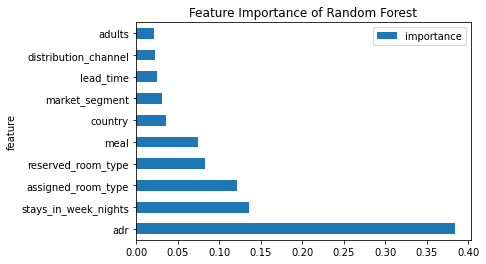

In [61]:
top_10 = stats.sort_values('importance', ascending=False).head(10)
top_10.plot(y='importance', x='feature', kind='barh')
plt.title('Feature Importance of Random Forest');

This is pretty aligned with what we saw in the correlations, so seems like the algorithm found the right patterns

To choose the best features, for classification, the measure of impurity is either the Gini impurity or the information gain/entropy, we decided to go forward with gini instead of entropy since entropy requires more computational steps, which means it will run slower, when training a tree, it is possible to compute how much each feature decreases the impurity. The more a feature decreases the impurity, the more important the feature is. In random forests, the impurity decrease from each feature can be averaged across trees to determine the final importance of the variable.



Now we will do Gini to measure the impurity of each of the features using a max depth = 9 as it gave us the highest possible accuracy

In [62]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators=100, max_depth=9))
sel.fit(x_train, y_train)
sel.get_support()
selected_feat= x_train.columns[(sel.get_support())]
len(selected_feat)

5

In [63]:
print(selected_feat)


Index(['stays_in_week_nights', 'meal', 'reserved_room_type',
       'assigned_room_type', 'adr'],
      dtype='object')


In [64]:
models = pd.DataFrame({
    'Model' : ['KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier', 'StandardScaler'],
    'Score' : [acc_knn, acc_dtc, acc_rd_clf, acc_ada, acc_knn_scaled]
})


models.sort_values(by = 'Score', ascending = False)

Model     Score
3      Ada Boost Classifier  0.941129
2  Random Forest Classifier  0.895799
1  Decision Tree Classifier  0.886338
4            StandardScaler  0.883857
0                       KNN  0.844245

In [65]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', title = 'Models Comparison')

<h2>Additional Testing<h2>

<h4>Using 10% of Data<h4>

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size = 0.1)

In [67]:
print(X_test.shape)
print(Y_test.shape)

(9513, 17)
(9513,)


In [68]:
ten_clf_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=100, random_state=0)
ten_clf_ada.fit(X_test, Y_test)

y_train_pred = ten_clf_ada.predict(X_test)
y_test_pred = ten_clf_ada.predict(x_test)

train_acc = accuracy_score(Y_test, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

ten_acc_ada = accuracy_score(y_test, y_test_pred)

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1score = f1_score(y_test, y_test_pred)

print('\n Train Accuracy: ', train_acc, 
      '\n Test Accuracy: ', test_acc,
      '\n Precision: ', precision,
      '\n Recall: ', recall,
      '\n F1 Score: ', f1score,
     )


 Train Accuracy:  0.97014611584148 
 Test Accuracy:  0.9202724864387536 
 Precision:  0.8924759520358414 
 Recall:  0.8624729402776009 
 F1 Score:  0.8772179769459915


<h4>Using 30% of Data<h4>

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size = 0.3)

print(X_test.shape)
print(Y_test.shape)

(28537, 17)
(28537,)


In [70]:
three_clf_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=100, random_state=0)
three_clf_ada.fit(X_test, Y_test)

y_train_pred = three_clf_ada.predict(X_test)
y_test_pred = three_clf_ada.predict(x_test)

train_acc = accuracy_score(Y_test, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

three_acc_ada = accuracy_score(y_test, y_test_pred)

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1score = f1_score(y_test, y_test_pred)

print('\n Train Accuracy: ', train_acc, 
      '\n Test Accuracy: ', test_acc,
      '\n Precision: ', precision,
      '\n Recall: ', recall,
      '\n F1 Score: ', f1score,
     )


 Train Accuracy:  0.9488733924378877 
 Test Accuracy:  0.9320886421933476 
 Precision:  0.9076058546785154 
 Recall:  0.8843753979370941 
 F1 Score:  0.8958400515962592


<h4>Using 50% of Data<h4>

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size = 0.5)

print(X_test.shape)
print(Y_test.shape)

(47561, 17)
(47561,)


In [72]:
five_clf_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=100, random_state=0)
five_clf_ada.fit(X_test, Y_test)

y_train_pred = five_clf_ada.predict(X_test)
y_test_pred = five_clf_ada.predict(x_test)

train_acc = accuracy_score(Y_test, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

five_acc_ada = accuracy_score(y_test, y_test_pred)

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1score = f1_score(y_test, y_test_pred)

print('\n Train Accuracy: ', train_acc, 
      '\n Test Accuracy: ', test_acc,
      '\n Precision: ', precision,
      '\n Recall: ', recall,
      '\n F1 Score: ', f1score,
     )


 Train Accuracy:  0.9451231050650744 
 Test Accuracy:  0.935494722677768 
 Precision:  0.9136012567089933 
 Recall:  0.8887049535209474 
 F1 Score:  0.9009811515620965


<h4>Using 70% of Data<h4>

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size = 0.7)

print(X_test.shape)
print(Y_test.shape)

(66585, 17)
(66585,)


In [74]:
seven_clf_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=100, random_state=0)
seven_clf_ada.fit(X_test, Y_test)

y_train_pred = seven_clf_ada.predict(X_test)
y_test_pred = seven_clf_ada.predict(x_test)

train_acc = accuracy_score(Y_test, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

seven_acc_ada = accuracy_score(y_test, y_test_pred)

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1score = f1_score(y_test, y_test_pred)

print('\n Train Accuracy: ', train_acc, 
      '\n Test Accuracy: ', test_acc,
      '\n Precision: ', precision,
      '\n Recall: ', recall,
      '\n F1 Score: ', f1score,
     )


 Train Accuracy:  0.9439663587895172 
 Test Accuracy:  0.9383120978932762 
 Precision:  0.9148908523908524 
 Recall:  0.896600025467974 
 F1 Score:  0.9056530966621648


<h3>Visualizing Additional Testing<h3>

We noticed that as we increased the portion of the training data from 10%, 30%, 50%, 70%, to 100% the accuracy steadily increased till it reached its peak 100% training data. We believe this is due to the increase of the data in our training data.

In [75]:
models = pd.DataFrame({
    'Model' : ['10%', '30%', '50%', 
               '70%', '100%'],
    'Score' : [ten_acc_ada, three_acc_ada, five_acc_ada, seven_acc_ada, acc_ada]
})


models.sort_values(by = 'Model', ascending = True)

Model     Score
0   10%  0.920272
4  100%  0.941129
1   30%  0.932089
2   50%  0.935495
3   70%  0.938312

In [76]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', title = 'Models Comparison')

<AxesSubplot:xlabel='Model', ylabel='Score'>

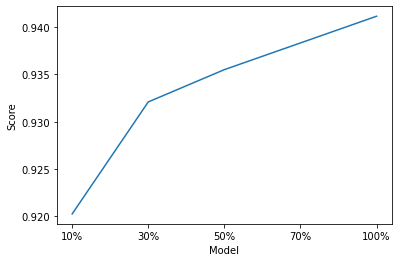

In [77]:
sns.lineplot(data = models, y = 'Score', x = 'Model', markers = True)

In [78]:
px.bar(models, x='Model', y='Score')

By comparing the results, we can see that there is not that great difference in our accuracy results, thus our predicition is very accurate for different percetnages as it ranges between 92-94% which is a miniscule (~2%)